**Import Necessary Libraries**

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold








**Load Dataset**

In [47]:
df = pd.read_csv("C:/Users/ohene/Downloads/emails.csv/emails.csv")

**Initial Data Exploration**

In [48]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [50]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [51]:
df.shape

(5172, 3002)

**Check For Missing Values**

In [52]:
# Check for missing values
df.isnull().sum()


Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

**Drop Unnecessary Columns**

In [53]:
# Drop the 'Email No.' column 
df = df.drop(columns=['Email No.'])


In [54]:
# Check the distribution of the target variable
df['Prediction'].value_counts(normalize=True)


0    0.709977
1    0.290023
Name: Prediction, dtype: float64

**Data Visualization**

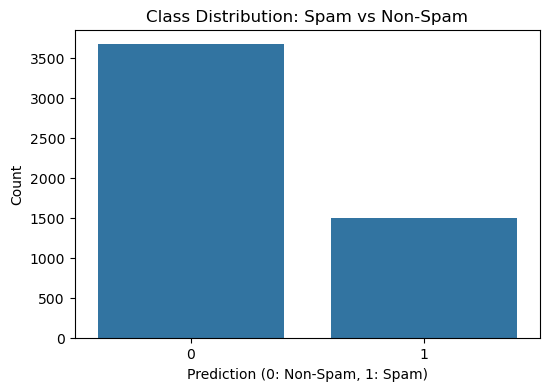

In [55]:
# Visualize class distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='Prediction', data=df)
plt.title('Class Distribution: Spam vs Non-Spam')
plt.xlabel('Prediction (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()

In [56]:
# Check a sample of non-spam email words to understand the structure
print("Sample words in non-spam emails:")
print(non_spam_text.sample(5))


Sample words in non-spam emails:
2848    the to ect and for of a you hou in on is this ...
3895    the to ect for of a you in on is this i be tha...
4658    to ect a you on i your at s by as me re e our ...
2636    the to ect for of a you in on is this i be tha...
1425    to ect for a in on enron i we s by or me e cor...
dtype: object


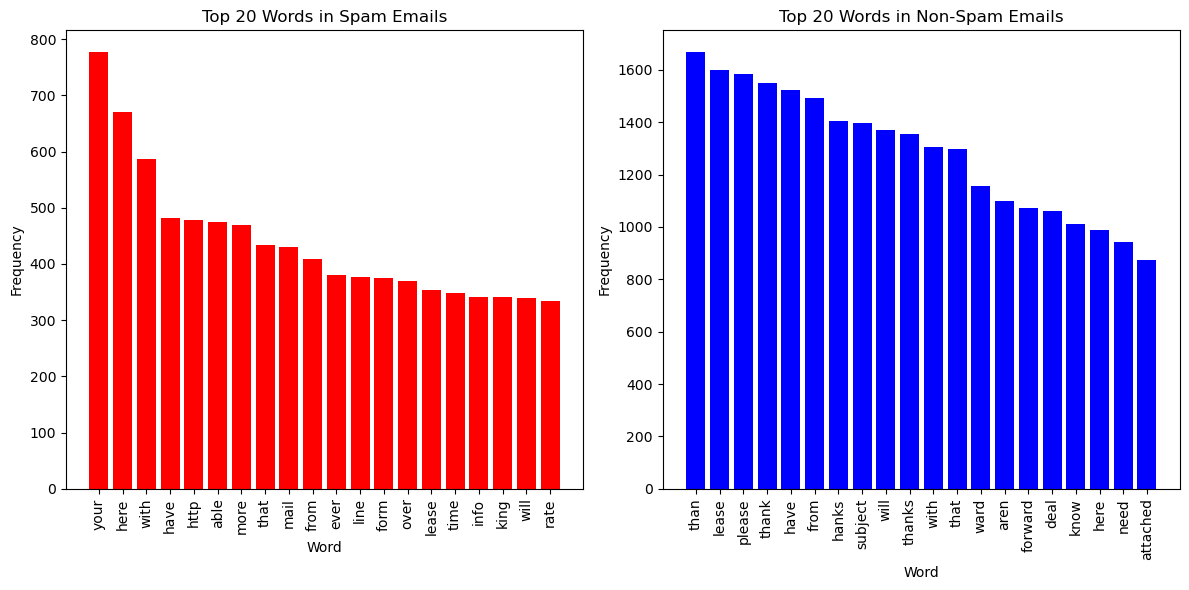

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a custom list of stopwords to filter out common terms
custom_stopwords = ['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'in', 'on', 'is', 'this', 'i', 'be', 'at', 'we', 's', 'enron', 'hou']

# Initialize CountVectorizer with updated settings
vectorizer = CountVectorizer(analyzer="word", stop_words=custom_stopwords, token_pattern=r'\b\w{4,}\b', min_df=5, max_df=0.85)

# Transform spam and non-spam text
spam_word_matrix = vectorizer.fit_transform(spam_text)
non_spam_word_matrix = vectorizer.transform(non_spam_text)

# Sum word counts
spam_word_counts = spam_word_matrix.sum(axis=0).A1
non_spam_word_counts = non_spam_word_matrix.sum(axis=0).A1

# Create dictionaries of words and counts
spam_word_dict = dict(zip(vectorizer.get_feature_names_out(), spam_word_counts))
non_spam_word_dict = dict(zip(vectorizer.get_feature_names_out(), non_spam_word_counts))

# Sort by frequency and select top 20 words
top_spam_words = dict(sorted(spam_word_dict.items(), key=lambda item: item[1], reverse=True)[:20])
top_non_spam_words = dict(sorted(non_spam_word_dict.items(), key=lambda item: item[1], reverse=True)[:20])

# Plot the top 20 words in spam and non-spam emails
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Spam plot
plt.subplot(1, 2, 1)
plt.bar(top_spam_words.keys(), top_spam_words.values(), color='red')
plt.title('Top 20 Words in Spam Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Non-spam plot
plt.subplot(1, 2, 2)
plt.bar(top_non_spam_words.keys(), top_non_spam_words.values(), color='blue')
plt.title('Top 20 Words in Non-Spam Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


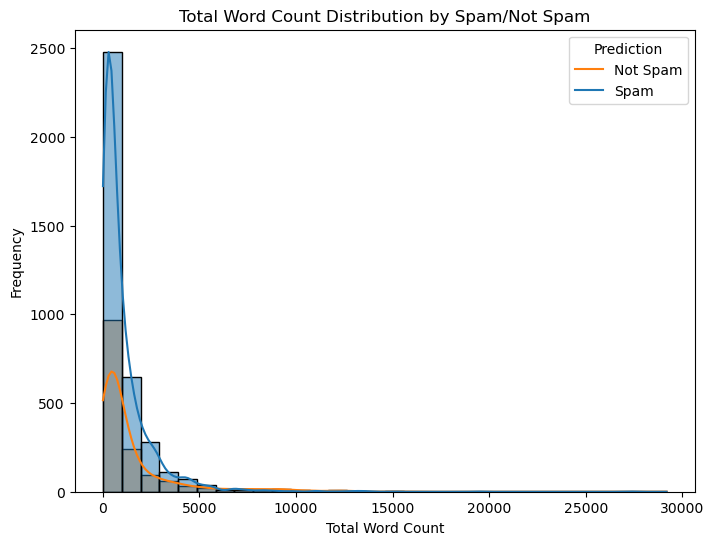

In [61]:
# Total Word Count Histogram
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='total_word_count', hue='Prediction', kde=True, bins=30)
plt.title('Total Word Count Distribution by Spam/Not Spam')
plt.xlabel('Total Word Count')
plt.ylabel('Frequency')
plt.legend(title='Prediction', labels=['Not Spam', 'Spam'])
plt.show()


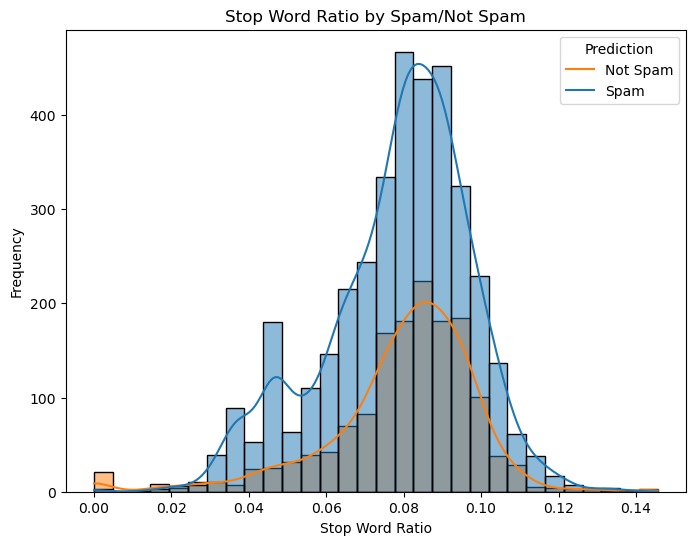

In [62]:
# Stop Word Ratio Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='stop_word_ratio', hue='Prediction', kde=True, bins=30)
plt.title('Stop Word Ratio by Spam/Not Spam')
plt.xlabel('Stop Word Ratio')
plt.ylabel('Frequency')
plt.legend(title='Prediction', labels=['Not Spam', 'Spam'])
plt.show()


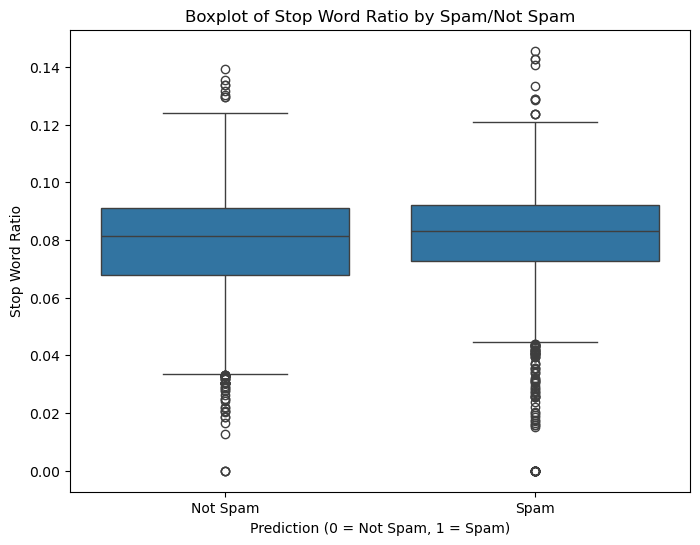

In [63]:
# Stop Word Ratio Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Prediction', y='stop_word_ratio', data=df)
plt.title('Boxplot of Stop Word Ratio by Spam/Not Spam')
plt.xlabel('Prediction (0 = Not Spam, 1 = Spam)')
plt.ylabel('Stop Word Ratio')
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.show()


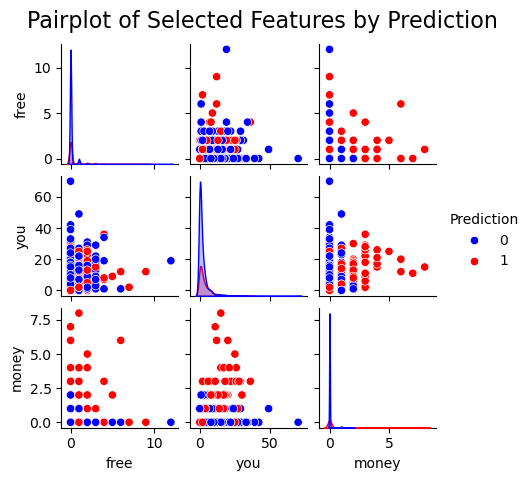

In [30]:
# Select a subset of key words for pair plot analysis
key_features = ['free', 'you', 'money', 'Prediction']

# Adjust the pairplot size
sns.pairplot(df[key_features], hue='Prediction', palette={0: 'blue', 1: 'red'}, height=1.5, aspect=1)

plt.suptitle("Pairplot of Selected Features by Prediction", y=1.05, fontsize=16)  
plt.show()


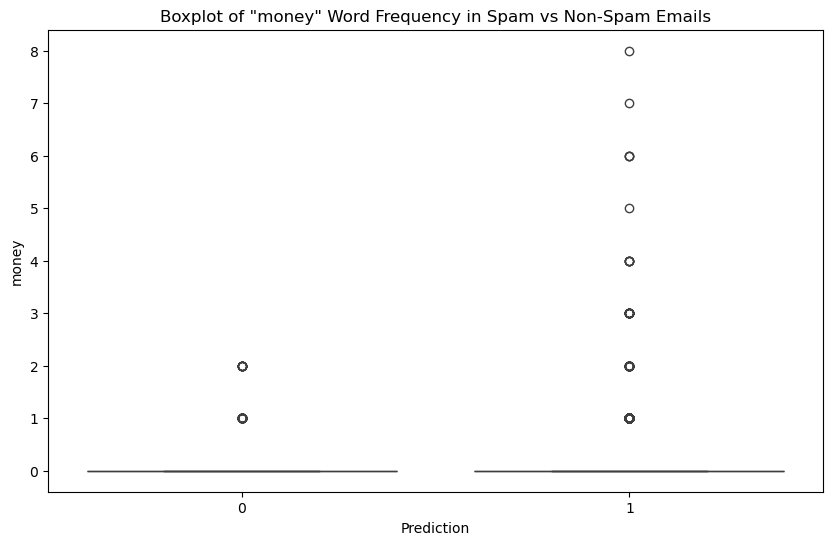

In [32]:
# Visualize outliers in word counts for  'money'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prediction', y='money', data=df)
plt.title('Boxplot of "money" Word Frequency in Spam vs Non-Spam Emails')
plt.show()




**Check And Remove Duplicate Entries**

In [33]:
# Check for duplicate rows
df.duplicated().sum()


541

In [34]:
# Remove duplicates 
df.drop_duplicates(inplace=True)

**Feature Scaling**

In [35]:
# Separate features and target
X = df.drop(columns=['Prediction'])  # Features
y = df['Prediction']  # Target

# Initialize scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)


**Unsupervised Learning - K Means Clustering**

In [36]:
# Initialize KMeans with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to your DataFrame
df['Cluster'] = cluster_labels

# Check how the clusters match with the actual 'Prediction' labels
pd.crosstab(df['Cluster'], df['Prediction'])


Prediction,0,1
Cluster,,
0,3170,1460
1,0,1


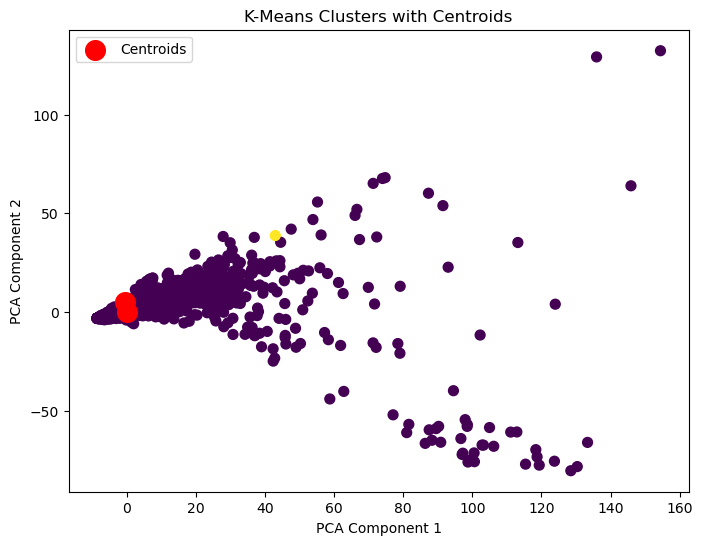

In [37]:
# K-Means with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)  

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters with their centers
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clusters with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [38]:
# Create a confusion matrix to evaluate clustering
conf_matrix = confusion_matrix(df['Prediction'], df['Cluster'])
print("Confusion Matrix (K-Means vs True Labels):\n", conf_matrix)


Confusion Matrix (K-Means vs True Labels):
 [[3170    0]
 [1460    1]]


**Train-Test Split And Final Scaling**

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:


# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Supervised Learning Models**

Logistic Regression Accuracy: 0.9654800431499461
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       633
           1       0.92      0.97      0.95       294

    accuracy                           0.97       927
   macro avg       0.95      0.97      0.96       927
weighted avg       0.97      0.97      0.97       927



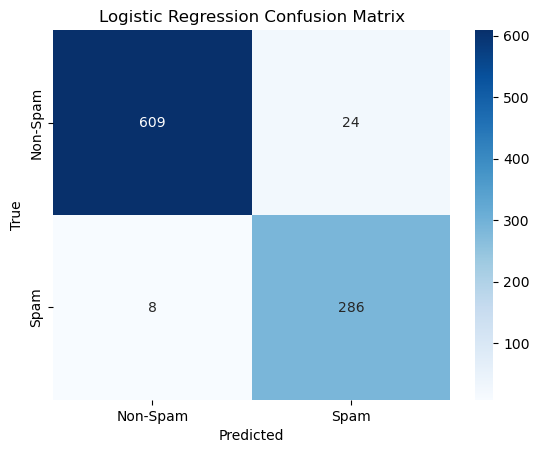

In [41]:
# Initialize Logistic Regression with class_weight='balanced'
model_lr = LogisticRegression(random_state=42, class_weight='balanced')

# Train the model
model_lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


C:\Users\ohene\anaconda3\envs\IOD\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\ohene\anaconda3\envs\IOD\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\ohene\anaconda3\envs\IOD\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behavi

Random Forest Accuracy: 0.9439050701186623
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       633
           1       0.85      1.00      0.92       294

    accuracy                           0.94       927
   macro avg       0.93      0.96      0.94       927
weighted avg       0.95      0.94      0.94       927



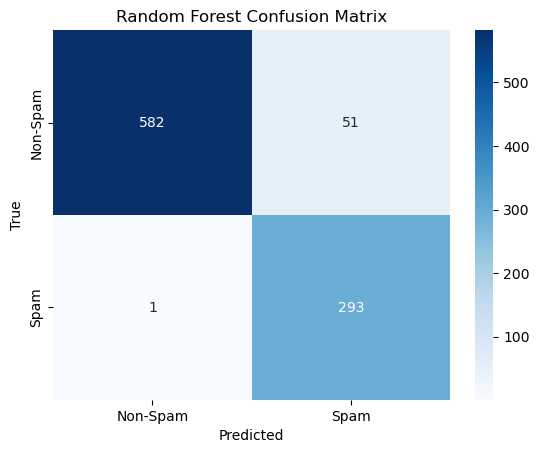

In [42]:
# Initialize Balanced Random Forest
model_rf = BalancedRandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


XGBoost Accuracy: 0.9719525350593312
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       633
           1       0.93      0.99      0.96       294

    accuracy                           0.97       927
   macro avg       0.96      0.98      0.97       927
weighted avg       0.97      0.97      0.97       927



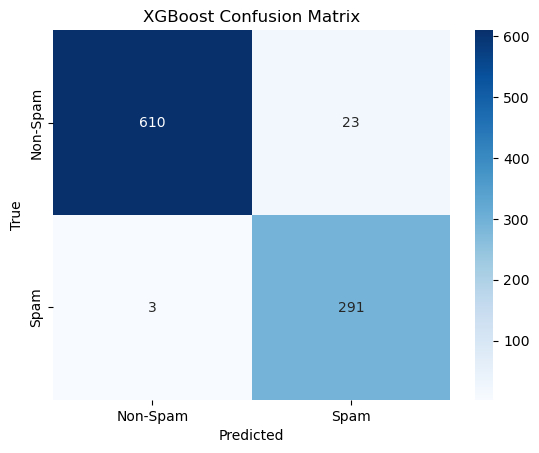

In [43]:
# Calculate scale_pos_weight
neg_count, pos_count = y_train.value_counts()
scale_pos_weight = neg_count / pos_count

# Initialize XGBoost with the calculated scale_pos_weight
model_xgb = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

# Train the model
model_xgb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Model Comaprison**

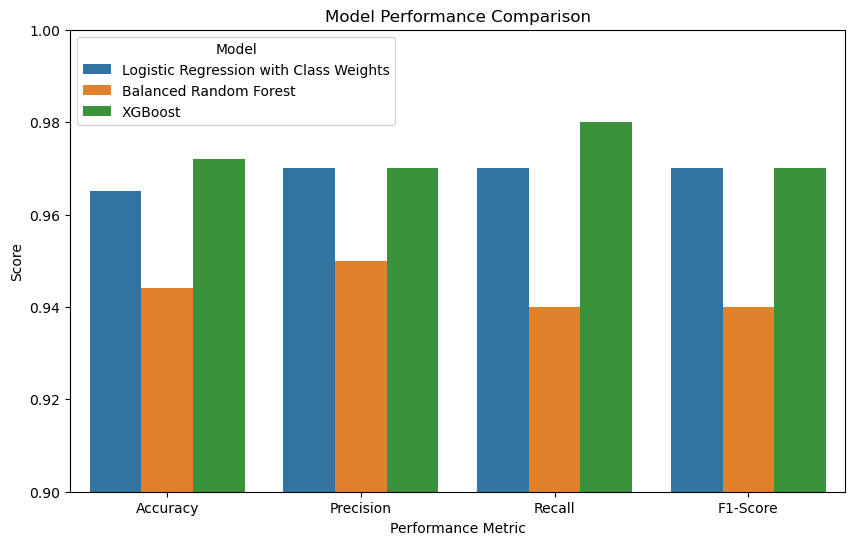

In [44]:
# Define model performance data
data = {
    'Model': ['Logistic Regression with Class Weights', 'Balanced Random Forest', 'XGBoost'],
    'Accuracy': [0.965, 0.944, 0.972],
    'Precision': [0.97, 0.95, 0.97],
    'Recall': [0.97, 0.94, 0.98],
    'F1-Score': [0.97, 0.94, 0.97]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted)

# Customize the plot
plt.title('Model Performance Comparison')
plt.ylim(0.9, 1.0)  
plt.ylabel('Score')
plt.xlabel('Performance Metric')
plt.legend(title='Model')
plt.show()


**Evaluate Models With ROC Curve**

C:\Users\ohene\anaconda3\envs\IOD\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\ohene\anaconda3\envs\IOD\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\ohene\anaconda3\envs\IOD\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behavi

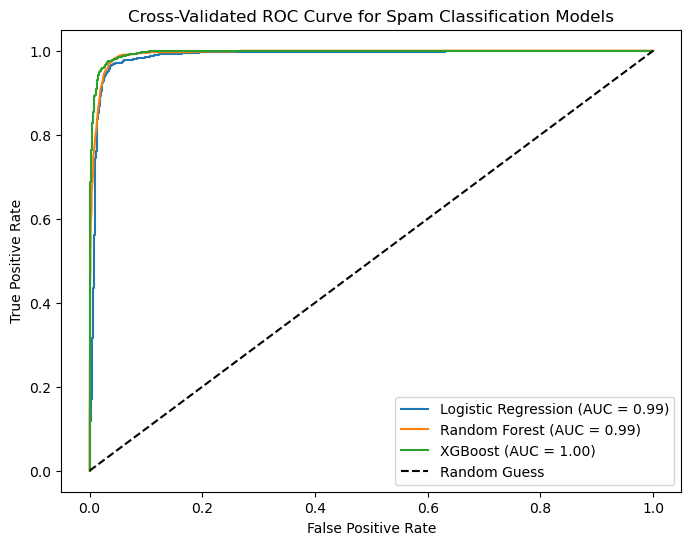

In [28]:

# Stratified KFold for better handling of the imbalanced dataset
skf = StratifiedKFold(n_splits=5)

plt.figure(figsize=(8, 6))

# Loop through models
for name, model in models:
    # Get cross-validated predictions for ROC curve
    y_pred_prob_cv = cross_val_predict(model, X_train_scaled, y_train, cv=skf, method='predict_proba')[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_train, y_pred_prob_cv)
    auc = roc_auc_score(y_train, y_pred_prob_cv)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validated ROC Curve for Spam Classification Models')
plt.legend(loc='lower right')
plt.show()


**Testing With A Dummy Email**

In [30]:
# Define word counts for our dummy email based on some common spammy words
dummy_email = {
    'free': 2,
    'money': 1,
    'offer': 1,
    'click': 1
}


In [31]:
# Get the list of feature columns from the original dataset, excluding target columns like 'Prediction'
feature_columns = df.drop(columns=[ 'Prediction']).columns

# Create a DataFrame for the dummy email with all values set to 0 initially
dummy_df = pd.DataFrame(0, index=[0], columns=feature_columns)

# Populate the dummy email DataFrame with the specific word counts
for word, count in dummy_email.items():
    if word in dummy_df.columns:
        dummy_df.at[0, word] = count





In [33]:
# Step 1: Extract the feature columns from the original training data

feature_columns = df.drop(columns=[ 'Prediction']).columns

# Display the list of feature columns to verify
print("Feature Columns from Training Data:", feature_columns)


Feature Columns from Training Data: Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'jay', 'valued', 'lay', 'infrastructure', 'military', 'allowing', 'ff',
       'dry', 'total_word_count', 'Cluster'],
      dtype='object', length=3002)


In [34]:
# Step 2: Reindex dummy_df to match feature_columns and fill missing values with 0
dummy_df = dummy_df.reindex(columns=feature_columns, fill_value=0)

# Verify alignment by comparing the columns of dummy_df with feature_columns
print("Columns in dummy_df:", dummy_df.columns)
print("Do columns match exactly?", dummy_df.columns.equals(feature_columns))


Columns in dummy_df: Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'jay', 'valued', 'lay', 'infrastructure', 'military', 'allowing', 'ff',
       'dry', 'total_word_count', 'Cluster'],
      dtype='object', length=3002)
Do columns match exactly? True


In [36]:
# Step 1: Drop any extra columns in dummy_df that are not part of feature_columns
dummy_df = dummy_df[feature_columns]

# Verify alignment by comparing the columns of dummy_df with feature_columns
print("Columns in dummy_df after dropping extras:", dummy_df.columns)
print("Do columns match exactly?", dummy_df.columns.equals(feature_columns))


Columns in dummy_df after dropping extras: Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'jay', 'valued', 'lay', 'infrastructure', 'military', 'allowing', 'ff',
       'dry', 'total_word_count', 'Cluster'],
      dtype='object', length=3002)
Do columns match exactly? True


In [38]:
# Get the exact columns that the scaler was fitted with
feature_columns = X_train.columns  
print("Feature Columns:", feature_columns)


Feature Columns: Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'total_word_count'],
      dtype='object', length=3001)


In [39]:
# Reindex dummy_df to match feature_columns exactly
dummy_df = dummy_df.reindex(columns=feature_columns, fill_value=0)

# Verify alignment
print("Columns in dummy_df after reindexing:", dummy_df.columns)
print("Do columns match exactly?", dummy_df.columns.equals(feature_columns))


Columns in dummy_df after reindexing: Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'total_word_count'],
      dtype='object', length=3001)
Do columns match exactly? True


In [40]:
# Scale the dummy email data using the fitted scaler
dummy_scaled = scaler.transform(dummy_df)


In [41]:
# Make predictions using the trained models
log_reg_pred = model_lr.predict(dummy_scaled)
log_reg_prob = model_lr.predict_proba(dummy_scaled)

rf_pred = model_rf.predict(dummy_scaled)
rf_prob = model_rf.predict_proba(dummy_scaled)

xgb_pred = model_xgb.predict(dummy_scaled)
xgb_prob = model_xgb.predict_proba(dummy_scaled)

# Display the results
print("Logistic Regression Prediction:", "Spam" if log_reg_pred[0] == 1 else "Not Spam")
print("Logistic Regression Probability:", log_reg_prob[0][1])

print("Random Forest Prediction:", "Spam" if rf_pred[0] == 1 else "Not Spam")
print("Random Forest Probability:", rf_prob[0][1])

print("XGBoost Prediction:", "Spam" if xgb_pred[0] == 1 else "Not Spam")
print("XGBoost Probability:", xgb_prob[0][1])


Logistic Regression Prediction: Spam
Logistic Regression Probability: 0.978503235206447
Random Forest Prediction: Spam
Random Forest Probability: 0.95
XGBoost Prediction: Spam
XGBoost Probability: 0.9979175
